In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv('Diamonds.csv')

In [4]:
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [5]:
df.shape

(53940, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [7]:

df.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [8]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
#EDA

<Axes: >

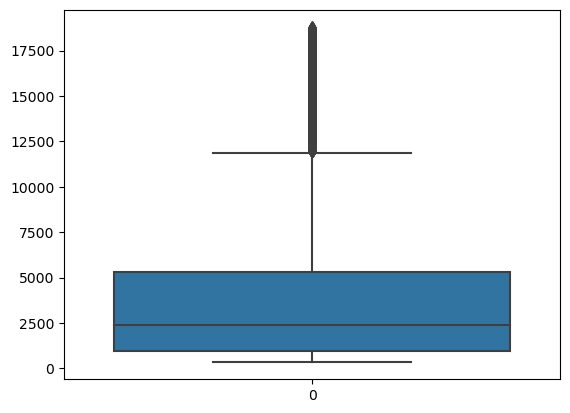

In [13]:
sns.boxplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

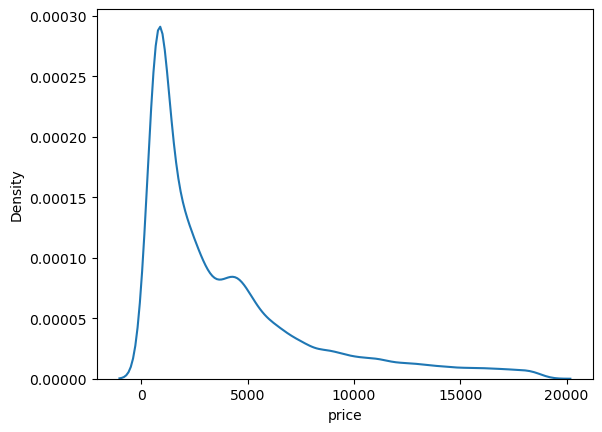

In [11]:
sns.kdeplot(df.price)

In [14]:
df.corr()

C:\Users\Sidd-pc\AppData\Local\Temp\ipykernel_11868\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


C:\Users\Sidd-pc\AppData\Local\Temp\ipykernel_11868\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

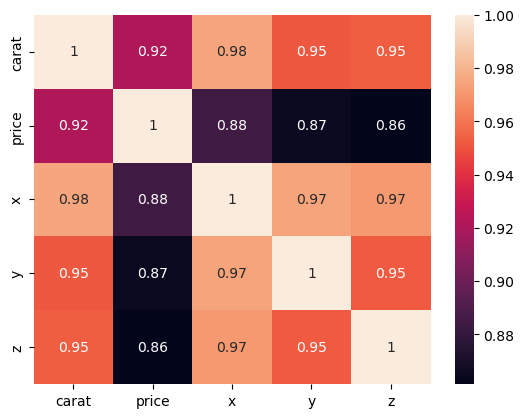

In [16]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='price', ylabel='cut'>

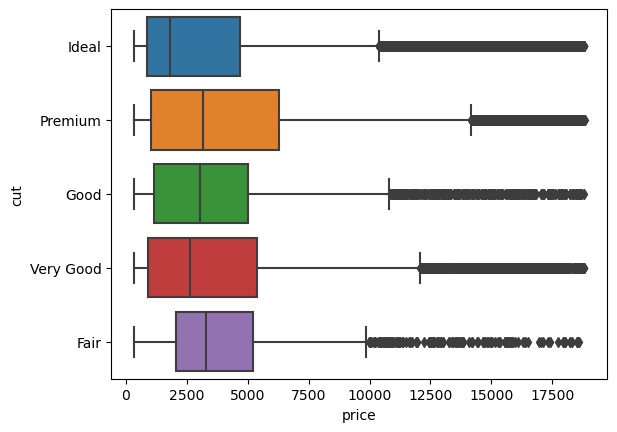

In [18]:
sns.boxplot(x=df.price, y=df.cut)

<Axes: xlabel='price', ylabel='clarity'>

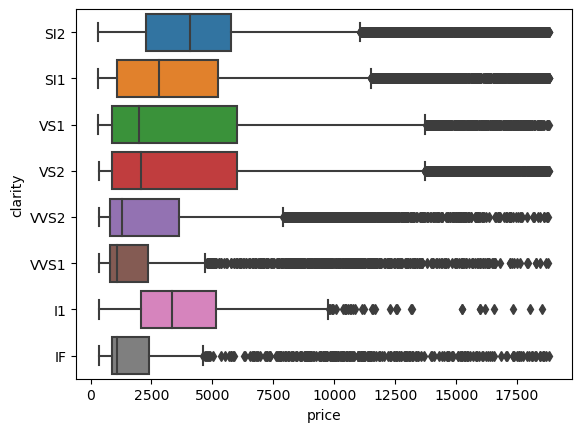

In [19]:
sns.boxplot(x=df.price, y=df.clarity)

<Axes: xlabel='price', ylabel='color'>

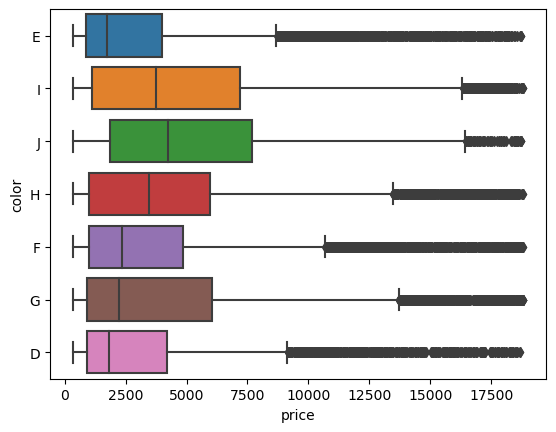

In [20]:
sns.boxplot(x=df.price, y=df.color)

<Axes: xlabel='carat', ylabel='price'>

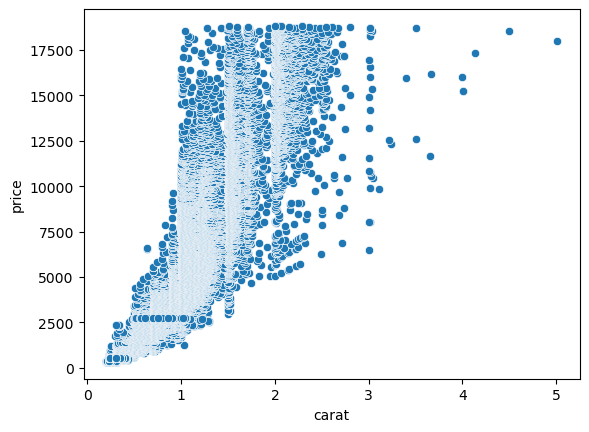

In [22]:
sns.scatterplot(x=df.carat, y=df.price)

<Axes: xlabel='carat', ylabel='price'>

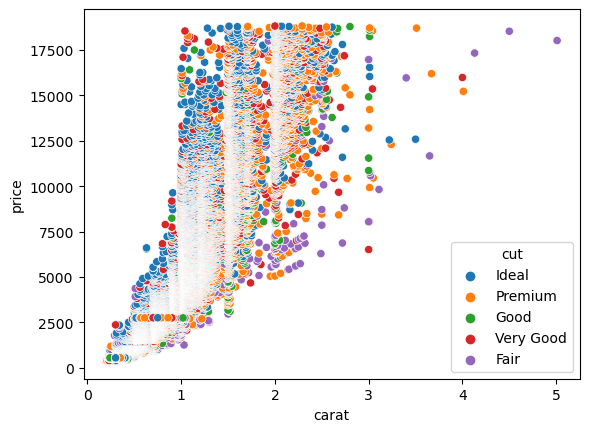

In [23]:
sns.scatterplot(x=df.carat, y=df.price, hue=df.cut)

<Axes: xlabel='carat', ylabel='price'>

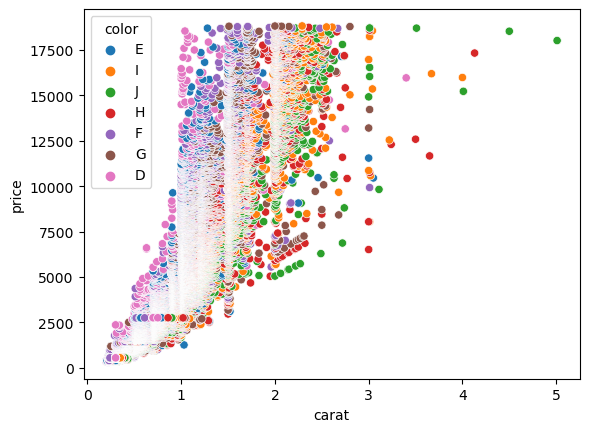

In [25]:
sns.scatterplot(x=df.carat, y=df.price, hue=df.color)

<Axes: xlabel='carat', ylabel='price'>

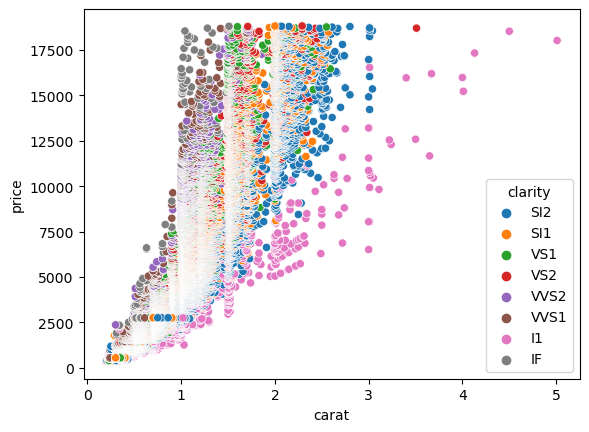

In [28]:
sns.scatterplot(x=df.carat, y=df.price,hue=df.clarity)

#  Multiple Linear Regression Model

In [29]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z'], dtype='object')

In [30]:
formula='price~carat + cut + color + clarity + x + y + z'

In [31]:
lm=smf.ols(formula=formula, data=df).fit()

In [32]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Thu, 12 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:53:30   Log-Likelihood:            -4.5584e+05
No. Observations:               53940   AIC:                         9.117e+05
Df Residuals:                   53918   BIC:                         9.119e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3642.4909     91.784  

In [33]:
pred=lm.predict(df)

<Axes: xlabel='price'>

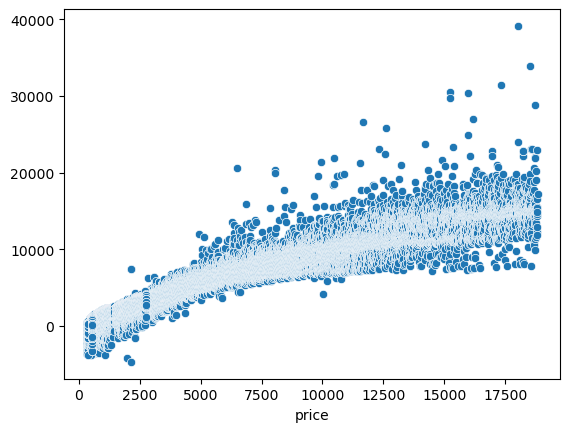

In [34]:
sns.scatterplot(x=df.price, y=pred)

In [35]:
resid=pred-df.price

<Axes: xlabel='price'>

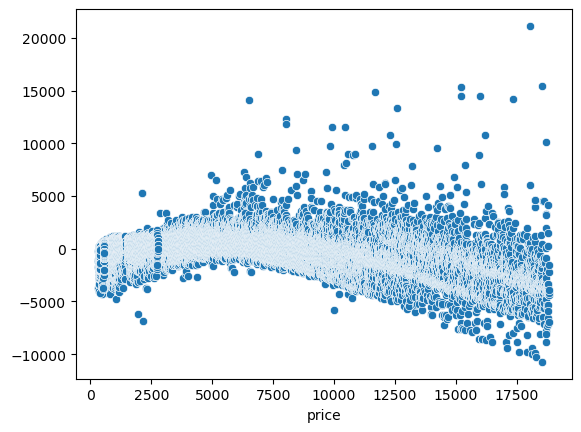

In [36]:
sns.scatterplot(x=df.price, y=resid)

<Axes: ylabel='Density'>

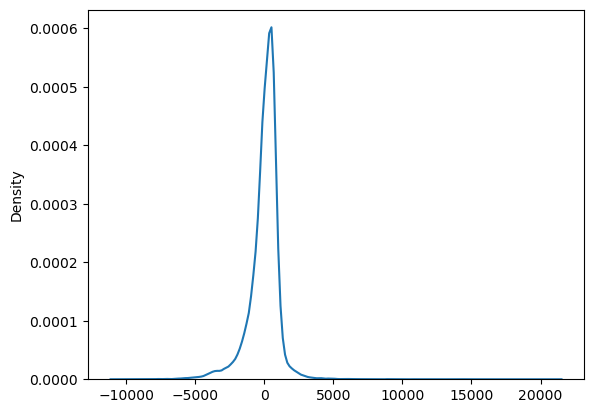

In [37]:
sns.kdeplot(resid)